Drop irrelevant or excess feastures

In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

C:\Users\ITD\AppData\Local\Temp\ipykernel_8256\272811689.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv('UNSW_NB15_testing-set.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [4]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,252,10112.025390,4709.134766,2,1,39.928778,52.241000,2223.730342,82.550500,255,3984155503,1796040391,255,0.172934,0.119331,0.053603,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,252,6039.783203,3892.583740,2,1,68.267778,81.137711,4286.828570,119.422719,255,1787309226,1767180493,255,0.143337,0.069136,0.074201,53,44,0,0,43,1,1,1,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,252,7377.527344,4754.747070,2,1,55.794000,66.054141,3770.580726,118.962633,255,205985702,316006300,255,0.116615,0.059195,0.057420,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,252,7087.796387,4568.018555,2,1,60.210889,68.109000,4060.625597,106.611547,255,884094874,3410317203,255,0.118584,0.066133,0.052451,53,44,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,252,14875.120120,6927.291016,2,1,27.505111,39.106801,1413.686415,57.200395,255,3368447996,584859215,255,0.087934,0.063116,0.024818,53,45,0,0,43,1,3,3,1,40,0,0,0,3,39,0,Normal,0


In [5]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065

In [6]:
list_drop = ['id','attack_cat']

In [7]:
df.drop(list_drop,axis=1,inplace=True)

Apply Clamping

In [8]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,0.467065,12.617323,10.006792,1697.289989,3648.210481,80957.198683,179.546997,79.609567,5.327025e+07,3.654831e+05,2.154630,3.029765,37.149345,29.464980,1682.831478,252.900753,116.257339,9.571385e+08,9.568256e+08,115.013625,0.041396,0.021020,0.020375,122.279478,112.609065,0.101745,9.849391,9.084264,1.304179,5.793283,4.903263,4.145226,8.505609,0.014948,0.014948,0.101745,6.624788,8.882760,0.015752,0.680622
std,0.816099,17.574046,16.840623,3266.805316,9675.446827,108507.397039,102.940011,110.506863,7.771134e+07,1.011632e+06,3.293608,6.159003,64.856251,49.122669,2824.169851,717.301377,127.001024,1.328074e+09,1.326927e+09,126.886530,0.079354,0.043400,0.040506,143.490588,215.656329,0.302313,38.245594,10.088830,0.954406,6.791916,6.544978,5.589185,10.339146,0.126048,0.126048,0.302313,7.307812,10.154088,0.124516,0.466237
min,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,32.786140,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,430.000000,164.000000,3225.806520,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1418.000000,1102.000000,125000.000300,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2513.295019,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,3.079511,64.000000,62.000000,13662.000000,39076.000000,333333.321500,255.000000,254.000000,2.666667e+08,4.071050e+06,12.000000,24.000000,245.212857,160.491672,9505.475298,3054.771518,255.000000,3.814196e+09,3.813017e+09,255.000000,2.518893,2.100352,1.520884,638.000000,786.000000,1.000000,166.000000,33.000000,6.000000,24.000000,22.000000,17.000000,33.000000,4.000000,4.000000,1.000000,26.000000,33.000000,1.000000,1.000000


Apply log function to nearly all numeric, since they are all mostly skewed to the right

In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

Reduce the labels in catagorical features

In [12]:
df_cat = df.select_dtypes(include=['object'])
df_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,133,13,9
top,tcp,-,INT
freq,79946,94168,82275


In [13]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [14]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,6,5,6
top,tcp,-,INT
freq,79946,100270,82275


In [15]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [16]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

In [17]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.114647,tcp,-,FIN,6.0,4.0,5.552960,5.153292,4.318654,252,254,9.558172,9.047394,0.0,0.0,3.230630,2.238047,3.439698,2.551833,255.0,20.248085,21.512874,255.0,0.000000,0.000000,0.000000,3.761200,3.784190,0.0,0.0,1.0,0,1.0,1.0,1.0,1.0,0,0,0.0,1.0,1.0,0,0
1,0.500716,tcp,-,FIN,14.0,38.0,6.598509,10.573289,4.375422,62,252,9.035524,13.129483,2.0,17.0,3.930158,2.799283,4.133997,7.236180,255.0,21.072432,21.847347,255.0,0.000000,0.000000,0.000000,3.951244,6.668228,0.0,0.0,33.0,1,1.0,1.0,1.0,2.0,0,0,0.0,1.0,6.0,0,0
2,0.964368,tcp,-,FIN,8.0,16.0,5.897154,9.486987,2.719330,62,252,7.360913,11.017485,1.0,6.0,5.450504,4.641861,9.159728,8.024787,255.0,21.472865,21.809507,255.0,0.106068,0.059643,0.049208,3.828641,6.668228,0.0,0.0,7.0,1,2.0,1.0,1.0,3.0,0,0,0.0,2.0,6.0,0,0
3,0.986429,tcp,-,FIN,12.0,12.0,6.442540,6.647688,2.686289,62,252,7.916143,8.119584,1.0,3.0,5.036151,4.513447,5.560990,8.024787,255.0,20.825027,20.769618,255.0,0.000000,0.000000,0.000000,3.951244,4.174387,0.0,0.0,1.0,1,2.0,1.0,1.0,3.0,1,1,0.0,2.0,1.0,0,0
4,0.371187,tcp,-,FIN,10.0,6.0,6.280396,5.594711,3.537295,254,252,9.055147,8.291060,2.0,1.0,3.886712,4.339375,7.790215,4.760523,255.0,21.613680,21.404924,255.0,0.120784,0.068730,0.055656,3.970292,3.828641,0.0,0.0,33.0,1,2.0,2.0,1.0,33.0,0,0,0.0,2.0,33.0,0,0


In [18]:
X = df.drop(['label',],axis=1)
y = df['label']

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
X['state'] = label_encoder.fit_transform(X['state'])

In [20]:
X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.114647,3,0,2,6.0,4.0,5.552960,5.153292,4.318654,252,254,9.558172,9.047394,0.0,0.0,3.230630,2.238047,3.439698,2.551833,255.0,20.248085,21.512874,255.0,0.000000,0.000000,0.000000,3.761200,3.784190,0.0,0.0,1.0,0,1.0,1.0,1.0,1.0,0,0,0.0,1.0,1.0,0
1,0.500716,3,0,2,14.0,38.0,6.598509,10.573289,4.375422,62,252,9.035524,13.129483,2.0,17.0,3.930158,2.799283,4.133997,7.236180,255.0,21.072432,21.847347,255.0,0.000000,0.000000,0.000000,3.951244,6.668228,0.0,0.0,33.0,1,1.0,1.0,1.0,2.0,0,0,0.0,1.0,6.0,0
2,0.964368,3,0,2,8.0,16.0,5.897154,9.486987,2.719330,62,252,7.360913,11.017485,1.0,6.0,5.450504,4.641861,9.159728,8.024787,255.0,21.472865,21.809507,255.0,0.106068,0.059643,0.049208,3.828641,6.668228,0.0,0.0,7.0,1,2.0,1.0,1.0,3.0,0,0,0.0,2.0,6.0,0
3,0.986429,3,0,2,12.0,12.0,6.442540,6.647688,2.686289,62,252,7.916143,8.119584,1.0,3.0,5.036151,4.513447,5.560990,8.024787,255.0,20.825027,20.769618,255.0,0.000000,0.000000,0.000000,3.951244,4.174387,0.0,0.0,1.0,1,2.0,1.0,1.0,3.0,1,1,0.0,2.0,1.0,0
4,0.371187,3,0,2,10.0,6.0,6.280396,5.594711,3.537295,254,252,9.055147,8.291060,2.0,1.0,3.886712,4.339375,7.790215,4.760523,255.0,21.613680,21.404924,255.0,0.120784,0.068730,0.055656,3.970292,3.828641,0.0,0.0,33.0,1,2.0,2.0,1.0,33.0,0,0,0.0,2.0,33.0,0


In [21]:
X.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                 float64
stcpb                float64
dtcpb                float64
dwin                 float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl           int64
ct_dst_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_l

In [22]:
df.shape

(175341, 43)

In [23]:
X.shape

(175341, 42)

View before and after of features

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
import pandas as pd
import numpy as np
import warnings
models = ExtraTreesClassifier()

In [25]:
from sklearn.feature_selection import chi2


def chi_square(X, y, models, seed):

    k_min = 1
    k_max = 43

    results = []
    k_values = []
    accuracy_values = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    for k in range(k_min, k_max):

        selector = SelectKBest(chi2, k=k)
        selector.fit(x_train, y_train)

        cols = selector.get_support(indices=True)

        x_train_s = x_train.iloc[:,cols]
        x_test_s = x_test.iloc[:,cols]

        #Fitting the training data
        models.fit(x_train_s, y_train)
        #Predict the response for test dataset
        y_pred = models.predict(x_test_s)
        
        accuracy_score = metrics.accuracy_score(y_test, y_pred)
        
        k_values.append(k)
        accuracy_values.append(accuracy_score)
        results.append([k, accuracy_score])

        print(f'ACC = {accuracy_score} K = {k} {x_train_s.columns.tolist()}')
    
    scores_ = np.log1p(selector.scores_)
    features_score = pd.DataFrame(np.round(scores_,4))
    features_pvalue = pd.DataFrame(np.round(selector.pvalues_,4))
    features = pd.DataFrame(X.columns)
    feature_score = pd.concat([features,features_score,features_pvalue],axis=1)

    # Assign the column name
    feature_score.columns = ["Input_Features","Chi2_Score","P_Value"]
    print('\n')
    print(feature_score.nlargest(75,columns="Chi2_Score"))

    headers = ["K", "Accuracy"]
    print('\n')
    print(tabulate(results, headers, tablefmt="pretty"))

    # สร้างกราฟแสดงความสัมพันธ์ระหว่างค่า k และค่าความแม่นยำ
    plt.figure(figsize=(20, 6))
    plt.plot(k_values, accuracy_values, marker='.', linestyle='-')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title(f'Chi-Square - MLP, seed = {seed}')
    plt.xticks(range(k_min, k_max))
    plt.grid(True)
    plt.show()

ACC = 0.9222390145142434 K = 1 ['sttl']
ACC = 0.9222675297271095 K = 2 ['sttl', 'swin']
ACC = 0.9266873877213493 K = 3 ['sttl', 'swin', 'dwin']
ACC = 0.9329322193390174 K = 4 ['dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9335880692349369 K = 5 ['spkts', 'dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9215546494054578 K = 6 ['spkts', 'dpkts', 'sttl', 'dload', 'swin', 'dwin']
ACC = 0.9227237731329664 K = 7 ['spkts', 'dpkts', 'sttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9236362599446805 K = 8 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9373235621203913 K = 9 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9414012375602384 K = 10 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9423422395848186 K = 11 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dtcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9432262111836665 K = 12 ['spkts', 'dpkts', 'dbytes'

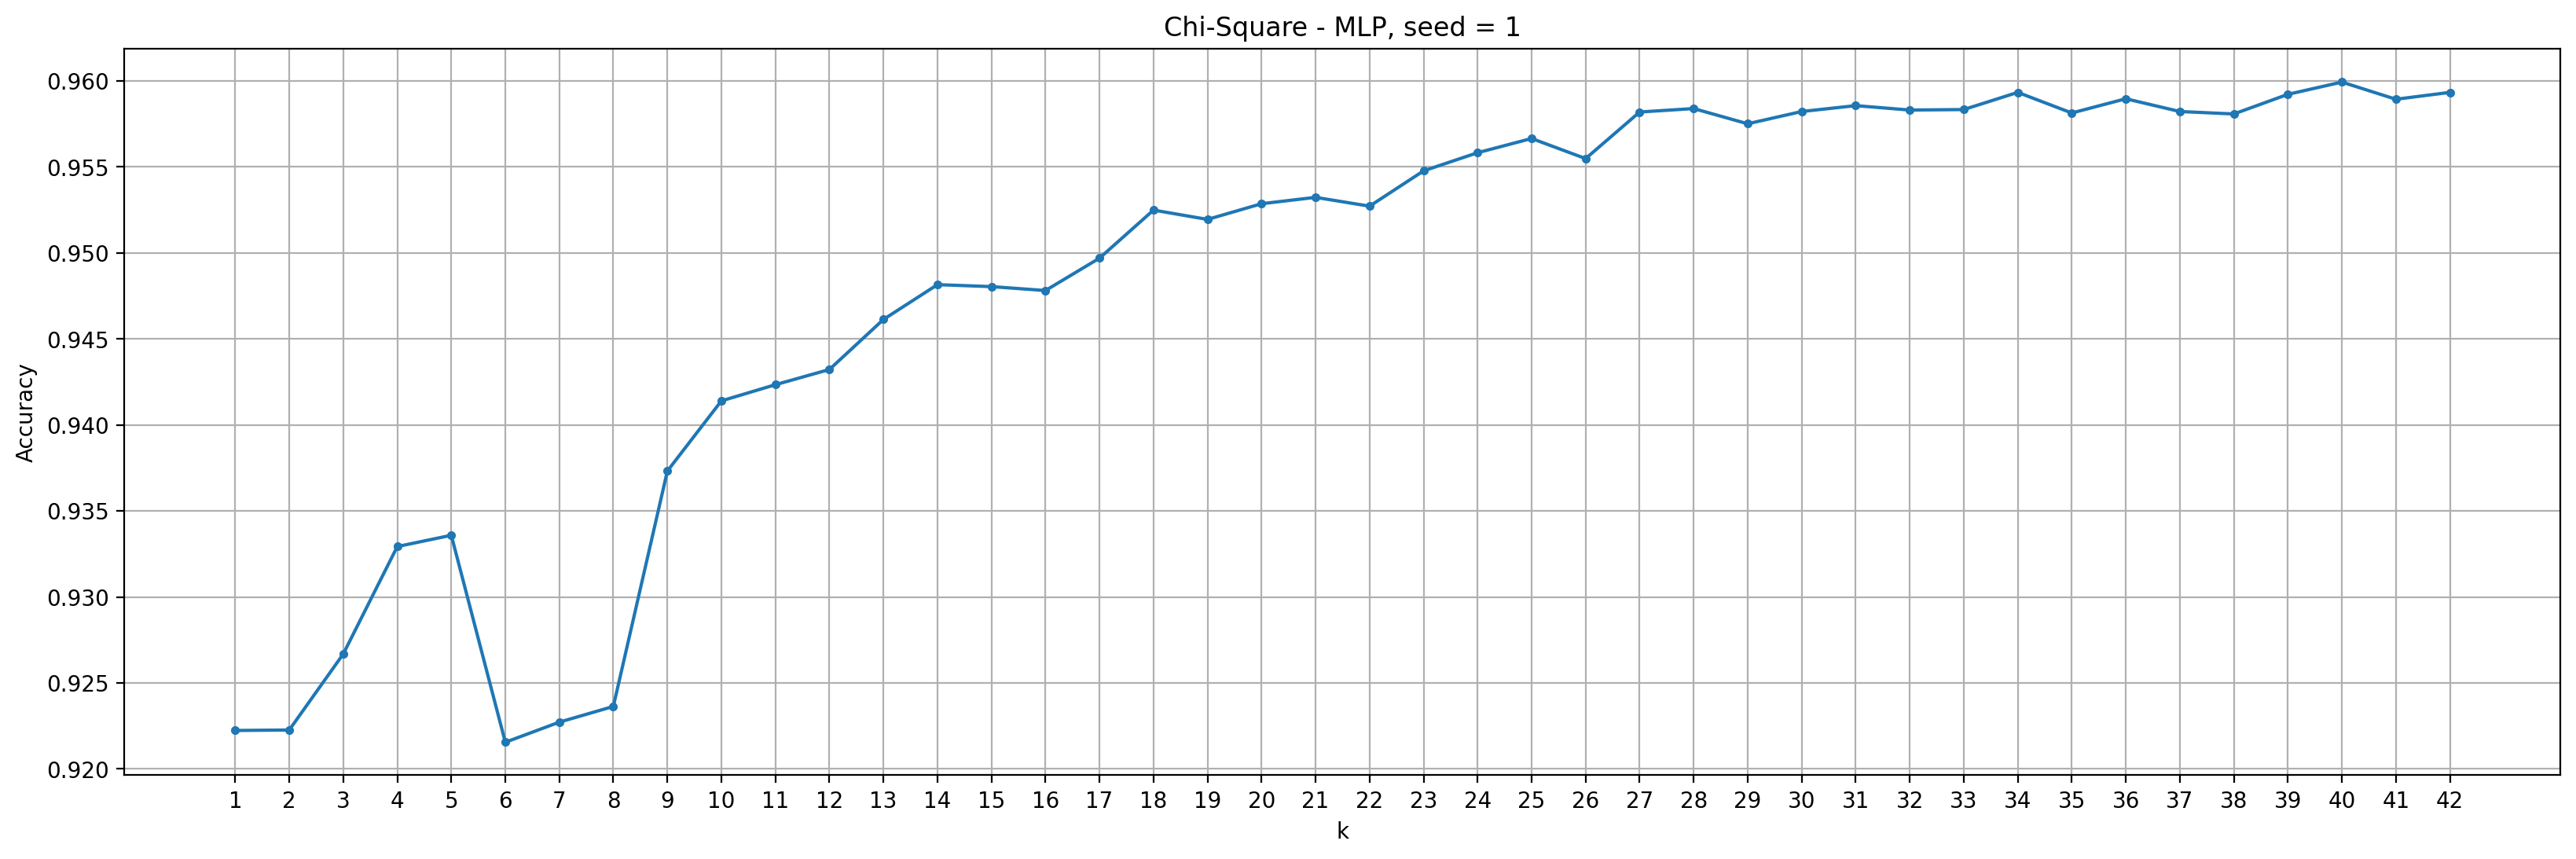

ACC = 0.9215831646183239 K = 1 ['sttl']
ACC = 0.921640195044056 K = 2 ['sttl', 'swin']
ACC = 0.9266873877213493 K = 3 ['sttl', 'swin', 'dwin']
ACC = 0.9325044911460264 K = 4 ['dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9336165844478029 K = 5 ['spkts', 'dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9222675297271095 K = 6 ['spkts', 'dpkts', 'sttl', 'dload', 'swin', 'dwin']
ACC = 0.9228948644101628 K = 7 ['spkts', 'dpkts', 'sttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9232370469645556 K = 8 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9362970144572129 K = 9 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9396047791496763 K = 10 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9405172659613904 K = 11 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dtcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.942085602669024 K = 12 ['spkts', 'dpkts', 'dbytes', 

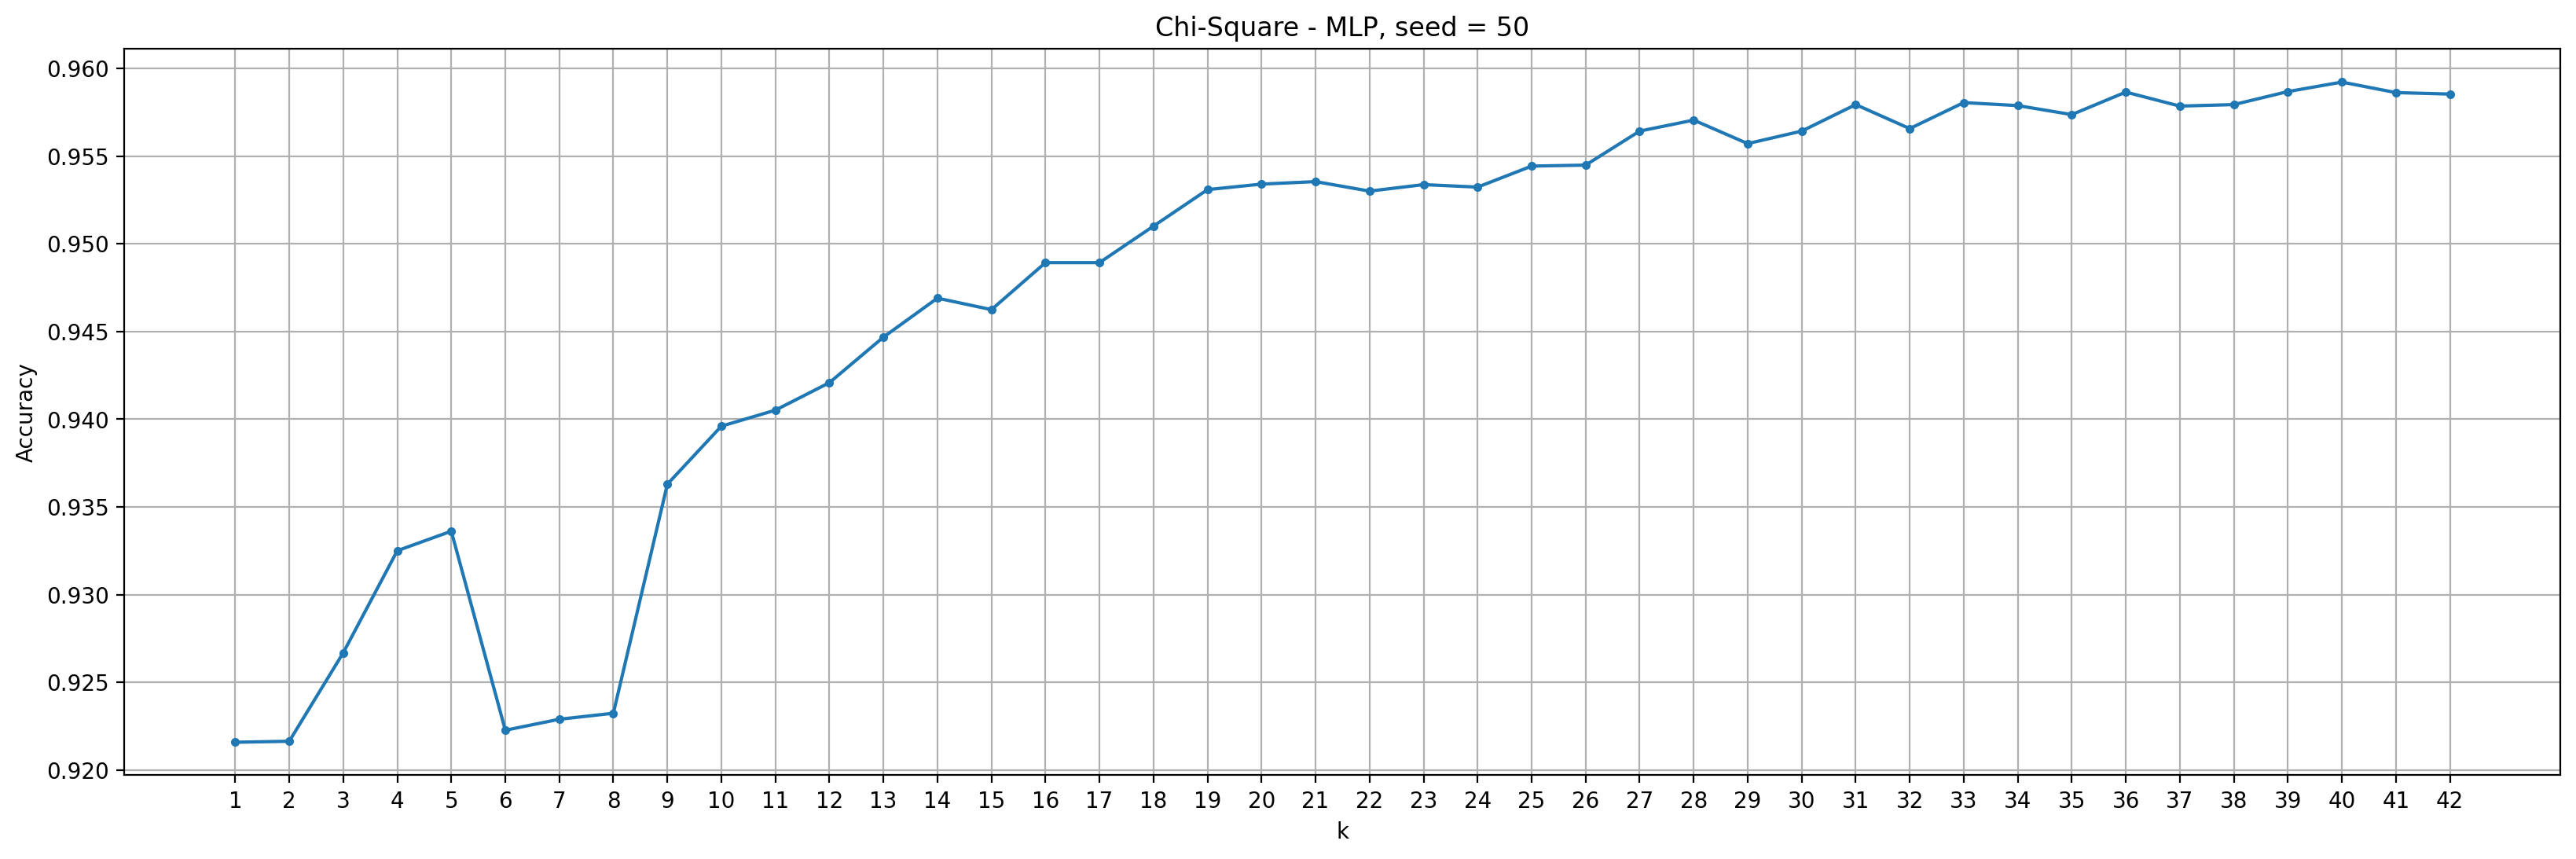

ACC = 0.9206136473808777 K = 1 ['sttl']
ACC = 0.9206991930194759 K = 2 ['sttl', 'swin']
ACC = 0.9262311443154924 K = 3 ['sttl', 'swin', 'dwin']
ACC = 0.9318201260372408 K = 4 ['dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9329322193390174 K = 5 ['spkts', 'dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9200718583364225 K = 6 ['spkts', 'dpkts', 'sttl', 'dload', 'swin', 'dwin']
ACC = 0.9212694972767972 K = 7 ['spkts', 'dpkts', 'sttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9209558299352705 K = 8 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9352704667940346 K = 9 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9394907182982121 K = 10 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9419145113918276 K = 11 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dtcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9418289657532294 K = 12 ['spkts', 'dpkts', 'dbytes'

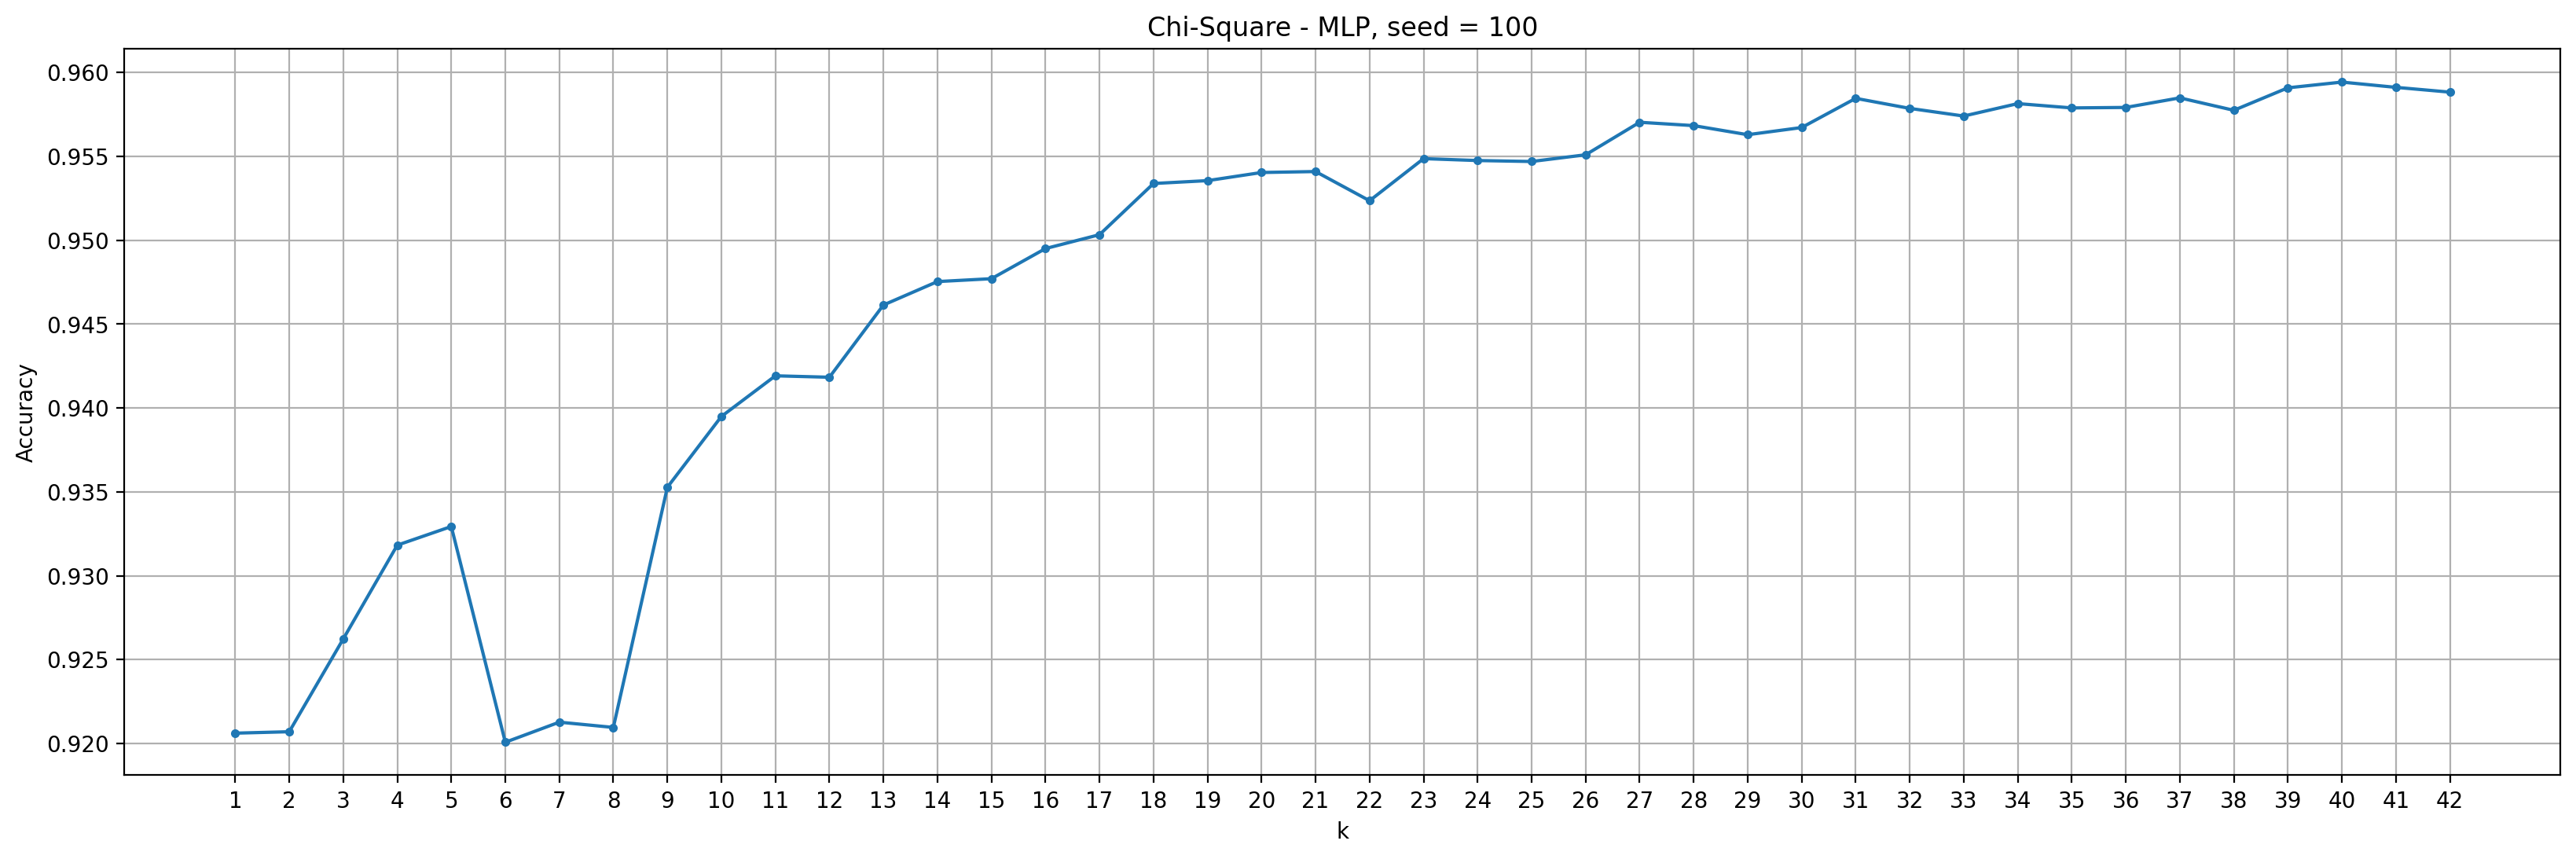

ACC = 0.9221249536627791 K = 1 ['sttl']
ACC = 0.9221534688756452 K = 2 ['sttl', 'swin']
ACC = 0.9273147224044027 K = 3 ['sttl', 'swin', 'dwin']
ACC = 0.9329607345518834 K = 4 ['dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9344435256209188 K = 5 ['spkts', 'dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9214976189797257 K = 6 ['spkts', 'dpkts', 'sttl', 'dload', 'swin', 'dwin']
ACC = 0.9225811970686362 K = 7 ['spkts', 'dpkts', 'sttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9222390145142434 K = 8 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.93675325786307 K = 9 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9418859961789615 K = 10 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9428840286292737 K = 11 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dtcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9441101827825145 K = 12 ['spkts', 'dpkts', 'dbytes', 

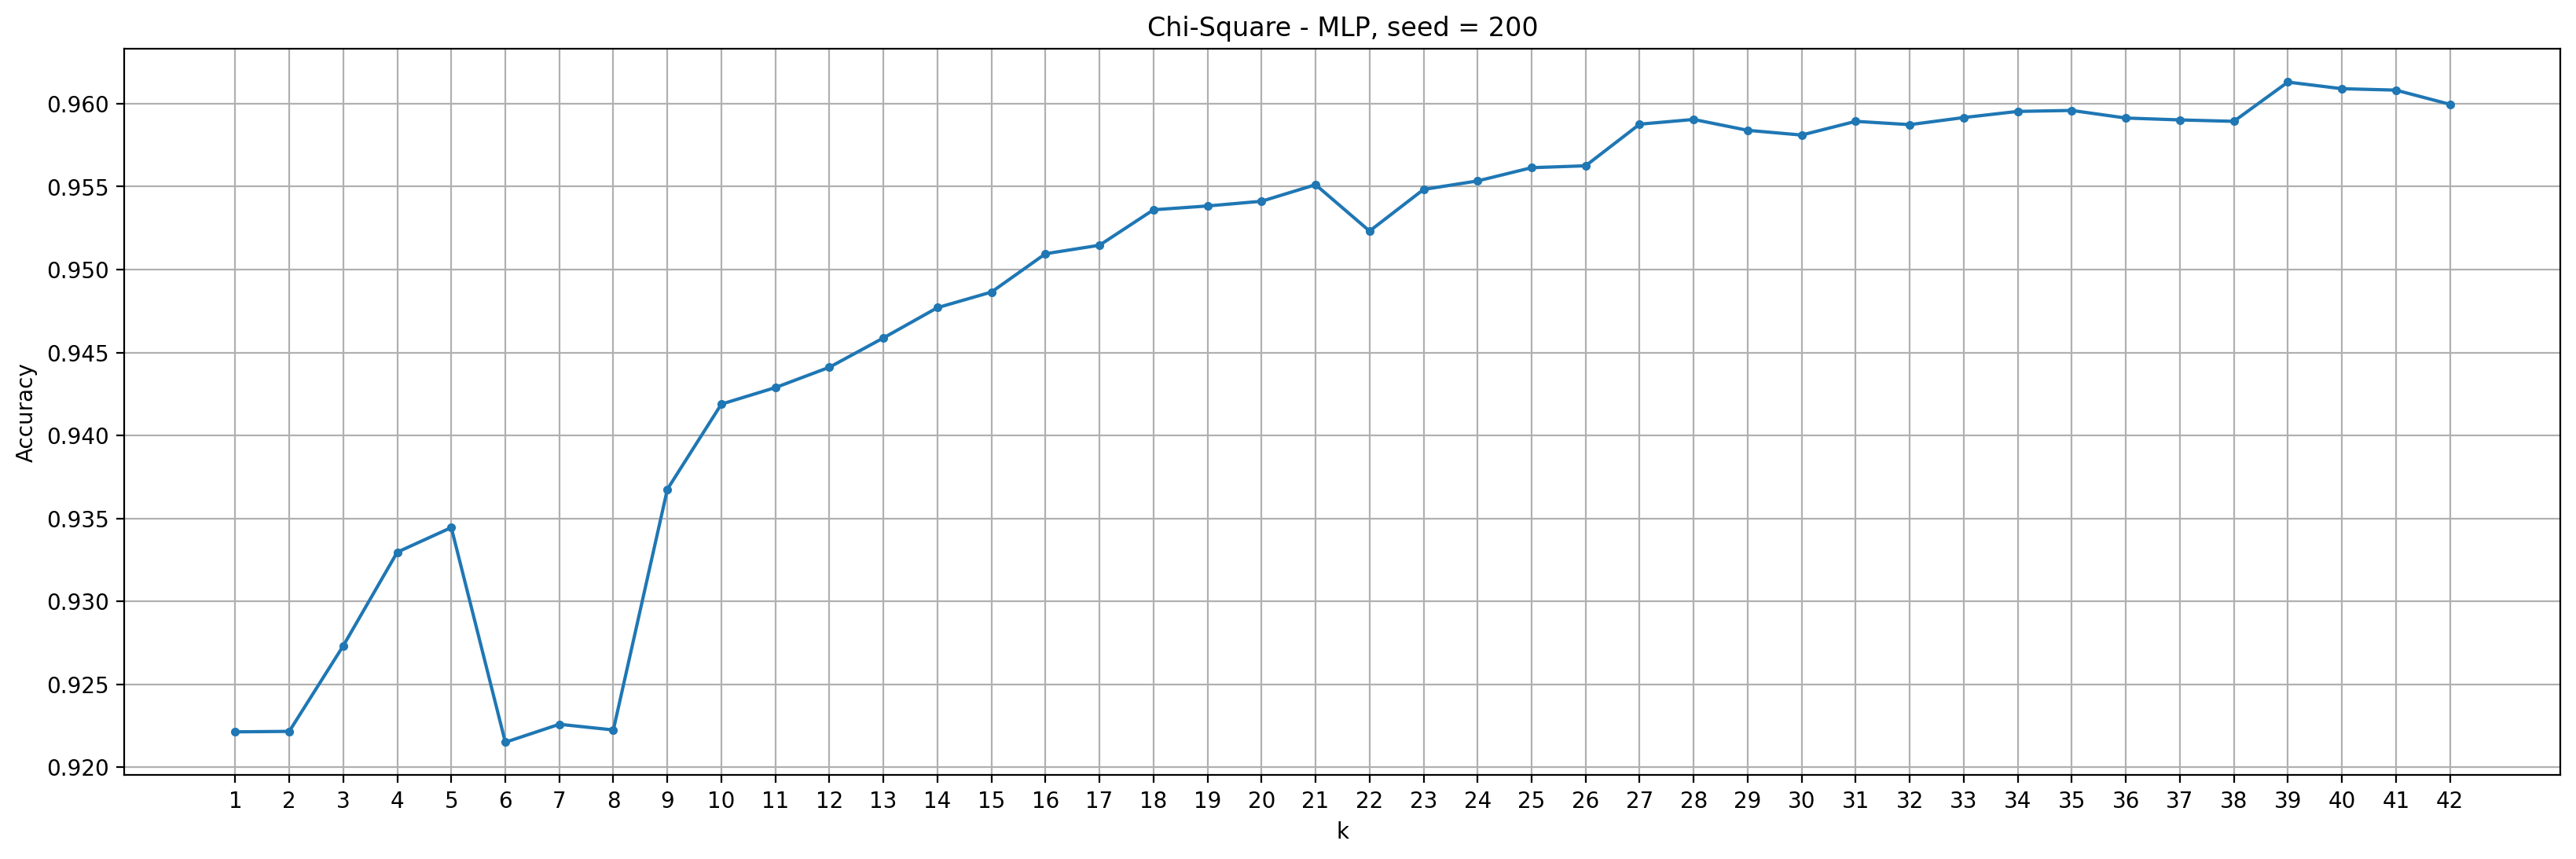

ACC = 0.9231515013259574 K = 1 ['sttl']
ACC = 0.9232085317516895 K = 2 ['sttl', 'swin']
ACC = 0.9282272092161168 K = 3 ['sttl', 'swin', 'dwin']
ACC = 0.9339872822150618 K = 4 ['dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9343864951951867 K = 5 ['spkts', 'dpkts', 'sttl', 'swin', 'dwin']
ACC = 0.9241780489891357 K = 6 ['spkts', 'dpkts', 'sttl', 'dload', 'swin', 'dwin']
ACC = 0.925176081439448 K = 7 ['spkts', 'dpkts', 'sttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9250905358008498 K = 8 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin']
ACC = 0.9370098947788645 K = 9 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9427984829906755 K = 10 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9431691807579343 K = 11 ['spkts', 'dpkts', 'sttl', 'dttl', 'dload', 'dloss', 'swin', 'stcpb', 'dtcpb', 'dwin', 'ct_dst_src_ltm']
ACC = 0.9453078217228892 K = 12 ['spkts', 'dpkts', 'dbytes',

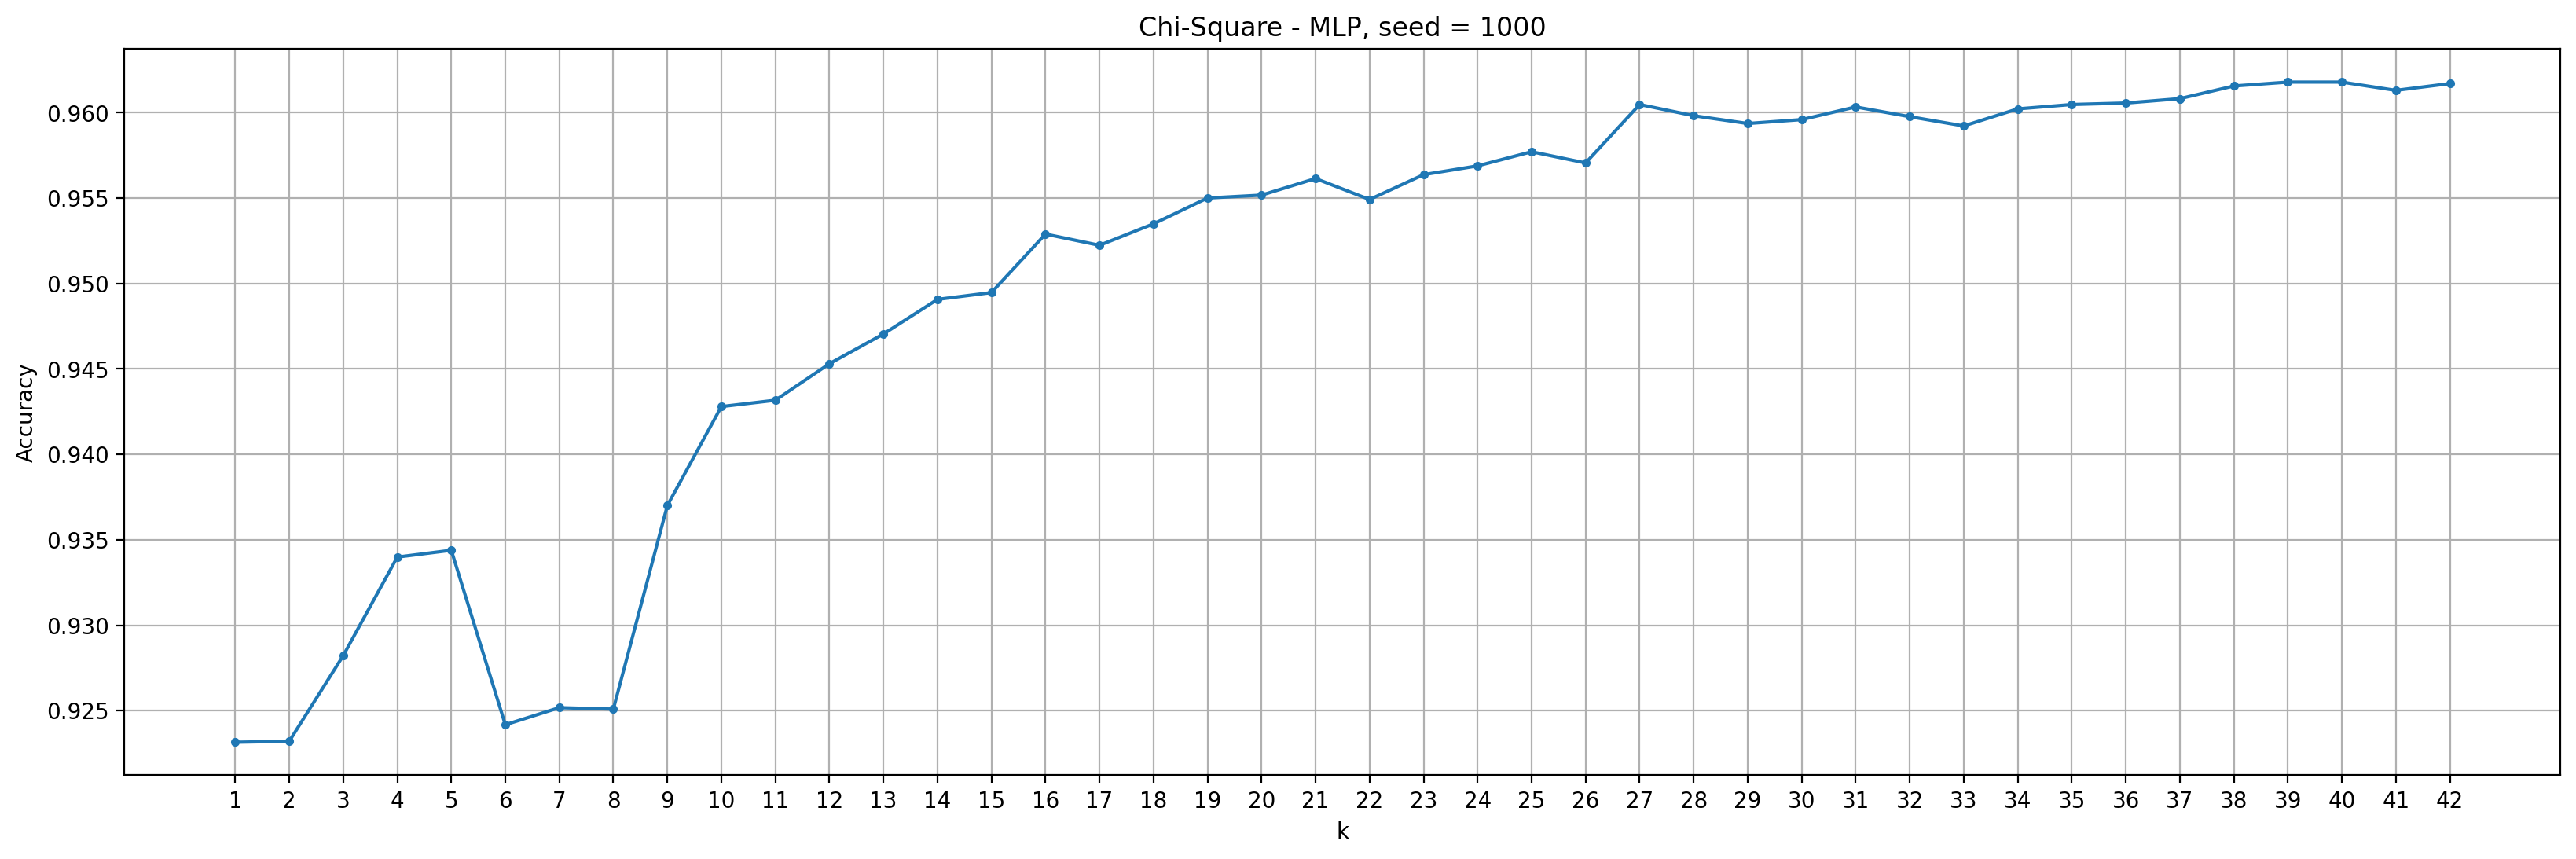

In [26]:
for seeds in [1,50,100,200,1000]:
    chi_square(X, y, models, seeds)